<a href="https://colab.research.google.com/github/JohnVicke/deep-learning/blob/master/CNN_laboration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN_Laboration
```
Author: Viktor Malmedal
Mail:   viktormalmedal@gmail.com
umuId:  vima0068
```

In [144]:
import tensorflow as tf
print(f'TensorFlow version: {tf.__version__}')

import tensorflow.keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
print(f'Keras version:      {tensorflow.keras.__version__}')

import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt

TensorFlow version: 2.6.0
Keras version:      2.6.0


In [145]:
import sys
if not tf.config.list_physical_devices('GPU'):
    print('No GPU detected. CNNs can be very slow without a GPU')
    if 'google.colab' in sys.modules:
        print('Go to RunTime > change runtime and select a GPU hardware accelerator')
else:
    !nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-6e7cc3fe-cbba-b770-02b5-c4f2fb1c8865)


In [165]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
label_descriptions = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat',
                      'sandals', 'shirt', 'sneaker', 'bag', 'ankle boots']

def split_random(data, labels, percent_train=80, random=True):
    print('Splitting data into test and validation')
    print(f'Using random       = {random}')
    print(f'Training split     = {percent_train}%')
    print(f'Validation split   = {100-percent_train}%')
    indicies = np.arange(data.shape[0])

    if random:
        np.random.shuffle(indicies)
    
    labels = labels[indicies]
    data   = data[indicies]
    rows   = data.shape[0]

    end_index = int(rows*percent_train/100)

    train_x = data[:end_index]
    train_y = labels[:end_index]

    validation_x = data[end_index:]
    validation_y = labels[end_index:]

    return (train_x, train_y), (validation_x, validation_y)

def validate_data(data, labels, data_set_name):
    """
        Naive validation, only validets shape of data compared to labels
    """

    nr_images, x, y = data.shape
    print(f'\nRunning validation on {data_set_name}')
    print(f'Number of images   = {nr_images}')
    print(f'Number of labels   = {len(labels)}')
    print(f'Image dimension    = {x}x{y}')
    if nr_images != len(labels):
        print('Number of images does not match number of labels')
    else:
        print('Data is OK ✅')

(train_x, train_y), (validation_x, validation_y) = split_random(x_train, y_train)

# increase readability since i will use train_x, train_y from here on 
test_x = x_test
test_y = y_test

validate_data(train_x, train_y, "training")
validate_data(validation_x, validation_y, "validation")


print_translation = [(f'[{i}]: {label_descriptions[i]}') for i in range(len(label_descriptions))]
print(f'\nTrain shape        = {train_x.shape}')
print(f'Validation shape   = {validation_x.shape}')
print(f'Test shape         = {x_test.shape}')
print(f'Unique labels      = {np.unique(train_y)}')
print(f'Label translation  = {print_translation}')

Splitting data into test and validation
Using random       = True
Training split     = 80%
Validation split   = 20%

Running validation on training
Number of images   = 48000
Number of labels   = 48000
Image dimension    = 28x28
Data is OK ✅

Running validation on validation
Number of images   = 12000
Number of labels   = 12000
Image dimension    = 28x28
Data is OK ✅

Train shape        = (48000, 28, 28)
Validation shape   = (12000, 28, 28)
Test shape         = (10000, 28, 28)
Unique labels      = [0 1 2 3 4 5 6 7 8 9]
Label translation  = ['[0]: t-shirt/top', '[1]: trouser', '[2]: pullover', '[3]: dress', '[4]: coat', '[5]: sandals', '[6]: shirt', '[7]: sneaker', '[8]: bag', '[9]: ankle boots']


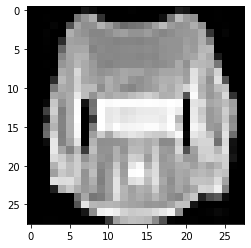

Image #36126 which is digit "6" (ankle boots)



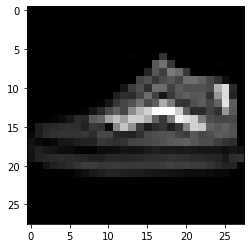

Image #25533 which is digit "7" (ankle boots)



In [148]:
from random import randrange
def plot_image(digit):
    plt.figure()
    plt.imshow(train_x[digit], cmap='gray', interpolation='nearest')
    plt.show(block=False)
    print(f'Image #{digit} which is digit "{train_y[digit]}" ({label_descriptions[y_train[digit]]})\n')

image_digits = [randrange(60000), randrange(60000)]
plots = [plot_image(a) for a in image_digits]


In [167]:
epochs = 15
batch_size = 32

nr_classes = len(np.unique(train_y))
_, x, y = train_x.shape
img_rows, img_cols = x, y

train_x = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
test_x = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

train_x = train_x.astype('float32')
test_x  = test_x.astype('float32')

train_x /= 255
test_x  /= 255

train_y = to_categorical(train_y, nr_classes)
test_y  = to_categorical(test_y, nr_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), 
                 activation='relu',
                 input_shape=input_shape))


10
28 28
